In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:])

    # Summations needed for the formula
    sum_x = np.sum(x[start:])
    sum_y = np.sum(y[start:])
    sum_x_squared = np.sum(x[start:] ** 2)
    sum_xy = np.sum(x[start:] * y[start:])

    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)

    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept



def prepare_for_spectral_criterion(var1d):
    # set the stride to a small value to sample the wave function evenly
    # 1, 2, 4 should all work, but higher values are faster
    stride = 1
    ghost_size = 1
    size_1d = 32
    max_order = 14

    re = np.real(var1d)
    im = np.imag(var1d)

    slope_max = -float('inf')

    # Generate all permutations of axes
    axes_permutations = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

    for axes in axes_permutations:
        # Transpose the array according to the current permutation
        transposed_re = np.transpose(re, axes=axes)
        transposed_im = np.transpose(im, axes=axes)
        for k in range(ghost_size, size_1d - ghost_size, stride):
            for j in range(ghost_size, size_1d - ghost_size, stride):
                row_re = transposed_re[:][k][j]
                row_im = transposed_im[:][k][j]
                row_de = row_re ** 2 + row_im ** 2

                al_re = np.zeros(max_order)
                al_im = np.zeros(max_order)
                al_de = np.zeros(max_order)
                ar_re = np.zeros(max_order)
                ar_im = np.zeros(max_order)
                ar_de = np.zeros(max_order)

                for i in range(max_order):
                    al_re[i] += flag_spectral_polynomials[i][:] @ row_re[:max_order]  # left boundary
                    al_im[i] += flag_spectral_polynomials[i][:] @ row_im[:max_order]  # left boundary
                    al_de[i] += flag_spectral_polynomials[i][:] @ row_de[:max_order]  # left boundary
                    ar_re[i] += flag_spectral_polynomials[i][:] @ row_re[size_1d - max_order:]  # right boundary
                    ar_im[i] += flag_spectral_polynomials[i][:] @ row_im[size_1d - max_order:]  # right boundary
                    ar_de[i] += flag_spectral_polynomials[i][:] @ row_de[size_1d - max_order:]  # right boundary

                order = np.arange(1, max_order+1)
                al_re_log = np.log(np.abs(al_re) + 1e-14)
                al_im_log = np.log(np.abs(al_im) + 1e-14)
                al_de_log = np.log(np.abs(al_de) + 1e-14)
                ar_re_log = np.log(np.abs(ar_re) + 1e-14)
                ar_im_log = np.log(np.abs(ar_im) + 1e-14)
                ar_de_log = np.log(np.abs(ar_de) + 1e-14)

                slope, _ = least_squares_regression(np.log(order), al_re_log, start = 5, end = -1)
                slope_max = max(slope_max, slope)
                slope, _ = least_squares_regression(np.log(order), ar_re_log, start = 5, end = -1)
                slope_max = max(slope_max, slope)

    return slope_max

# Define parameters
PS2 = 16
GhostSize = 8
Size1D = PS2 + 2 * GhostSize
Stride = 1
MaxOrder = 14

# Generate Var1D data
X = np.linspace(0, 2 * np.pi, Size1D)
x, y, z = np.meshgrid(X, X, X)
wavelengths = np.arange(1, 32)

slopes = [prepare_for_spectral_criterion(np.exp(1j* x * k)) for k in wavelengths]




KeyboardInterrupt: 

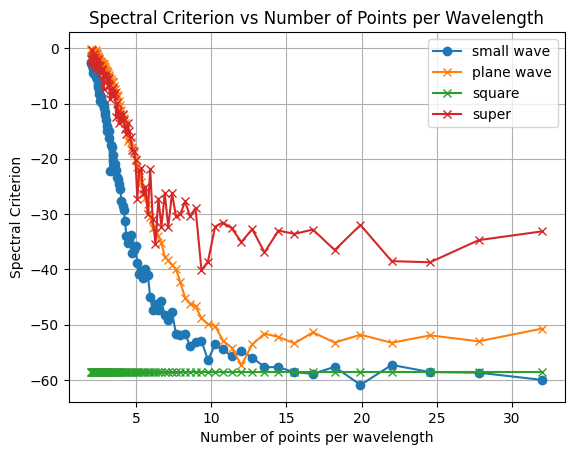

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:end])

    # Summations needed for the formula
    sum_x = np.sum(x[start:end])
    sum_y = np.sum(y[start:end])
    sum_x_squared = np.sum(x[start:end] ** 2)
    sum_xy = np.sum(x[start:end] * y[start:end])

    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)

    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept



def prepare_for_spectral_criterion(var1d, start, end):
    # set the stride to a small value to sample the wave function evenly
    # 1, 2, 4 should all work, but higher values are faster
    stride = 1
    ghost_size = 8
    size_1d = 32
    max_order = 14

    row_re = np.real(var1d)
    row_im = np.imag(var1d)

    slope_max = -float('inf')

    row_de = row_re ** 2 + row_im ** 2

    al_re = np.zeros(max_order)
    al_im = np.zeros(max_order)
    al_de = np.zeros(max_order)
    ar_re = np.zeros(max_order)
    ar_im = np.zeros(max_order)
    ar_de = np.zeros(max_order)

    for i in range(max_order):
        al_re[i] += flag_spectral_polynomials[i][:] @ row_re[:max_order]  # left boundary
        al_im[i] += flag_spectral_polynomials[i][:] @ row_im[:max_order]  # left boundary
        al_de[i] += flag_spectral_polynomials[i][:] @ row_de[:max_order]  # left boundary
        ar_re[i] += flag_spectral_polynomials[i][:] @ row_re[size_1d - max_order:]  # right boundary
        ar_im[i] += flag_spectral_polynomials[i][:] @ row_im[size_1d - max_order:]  # right boundary
        ar_de[i] += flag_spectral_polynomials[i][:] @ row_de[size_1d - max_order:]  # right boundary

    order = np.log10(np.arange(1, max_order+1))

    ars = [al_re, al_im, al_de, ar_re, ar_im, ar_de]
    arl = [np.log10(np.abs(a) + 1e-16) for a in ars]

    for a in arl:
        a = a - 1/(1 + np.exp(1*(a+6))) * 5 * np.arange(0, max_order)
        slope, _ = least_squares_regression(order, a, start = start, end = end)
        slope_max = max(slope_max, slope)
    return slope_max


# Define parameters
PS2 = 16
GhostSize = 8
Size1D = PS2 + 2 * GhostSize
Stride = 1
MaxOrder = 14

# Generate Var1D data
x = np.linspace(0, np.pi, 33)[:-1]
ks = np.linspace(1, 16, 100)


# Function to generate the complex wave function based on the Schrödinger equation
def f1(x, k, time = 0.5):
    # Given parameters
    VorPairLin_BgAmp = 0.5
    VorPairLin_WaveAmp = -1.0
    VorPairLin_Phase0 = 0.0
    VorPairLin_Omega = 0.5  # Simplified for demonstration

    phase = k * x - VorPairLin_Omega * time + VorPairLin_Phase0
    amp = VorPairLin_WaveAmp
    Re = VorPairLin_BgAmp + amp * np.cos(phase)
    Im = amp * np.sin(phase) + np.cos(phase *2)
    return Re + 1j * Im


def f1(x, k):
    return np.arange(len(x))**0 + 0.01 * np.exp(1j * x * k)
def f2(x, k):
    return np.exp(1j * x * k)
def f3(x, k):
    return np.arange(len(x))**2

def f4(x, k_max):
    y = np.zeros(x.shape, dtype=np.complex128)  # Initialize the output array

    for k in np.linspace(0, k_max, 20):
        # Generate random coefficients between 0 and 1
        coeff = np.random.rand()

        # Add the contribution of the plane wave with coefficient 'coeff' and wavevector 'k'
        y += coeff * np.exp(1j * x * k)

    return y

slopes1 = [prepare_for_spectral_criterion(f1(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes2 = [prepare_for_spectral_criterion(f2(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes3 = [prepare_for_spectral_criterion(f3(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes4 = [prepare_for_spectral_criterion(f4(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]



# Plot
plt.figure()
plt.plot(32/ks, slopes1, marker='o', linestyle='-', label="small wave")
plt.plot(32/ks, slopes2, marker='x', linestyle='-', label="plane wave")
plt.plot(32/ks, slopes3, marker='x', linestyle='-' ,label="square")
plt.plot(32/ks, slopes4, marker='x', linestyle='-', label="super")
plt.xlabel('Number of points per wavelength')
plt.ylabel('Spectral Criterion')
plt.title('Spectral Criterion vs Number of Points per Wavelength')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
x = np.arange(10)
np.argwhere(x > 6)

array([[7],
       [8],
       [9]])

-4.809400645094393 4.235566462563974


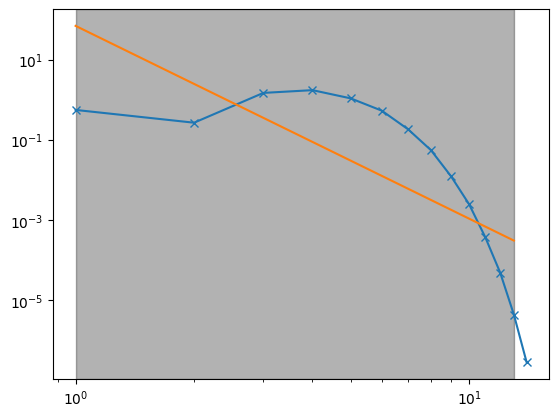

In [ ]:

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:])

    # Summations needed for the formula
    sum_x = np.sum(x[start:])
    sum_y = np.sum(y[start:])
    sum_x_squared = np.sum(x[start:] ** 2)
    sum_xy = np.sum(x[start:] * y[start:])

    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)

    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept

Size1D = 32

k = 3
# Generate Var1D data
x = np.linspace(0, 2 * np.pi, Size1D)

y =  np.exp(1j * x * k)

max_order = 14
size_1d = 14

row_re = np.real(y)
row_im = np.imag(y)


al_re = np.zeros(max_order)
al_im = np.zeros(max_order)
al_de = np.zeros(max_order)
ar_re = np.zeros(max_order)
ar_im = np.zeros(max_order)
ar_de = np.zeros(max_order)

for i in range(max_order):
    for t in range(max_order):
        al_re[i] += flag_spectral_polynomials[i][t] * row_re[t]  # left boundary
        al_im[i] += flag_spectral_polynomials[i][t] * row_im[t]  # left boundary
        ar_re[i] += flag_spectral_polynomials[i][t] * row_re[size_1d - max_order + t]  # right boundary
        ar_im[i] += flag_spectral_polynomials[i][t] * row_im[size_1d - max_order + t]  # right boundary

order     = np.arange(1, max_order+1)
al_re_log = np.log(np.abs(al_re) + 1e-14)
al_im_log = np.log(np.abs(al_im) + 1e-14)
al_de_log = np.log(np.abs(al_de) + 1e-14)
ar_re_log = np.log(np.abs(ar_re) + 1e-14)
ar_im_log = np.log(np.abs(ar_im) + 1e-14)
ar_de_log = np.log(np.abs(ar_de) + 1e-14)

# Define the linear model function
def linear_model(x, m, b):
    return m * x + b

#al_re_log = np.log((order*1.0)**-2)
start =  0
end   = -1
slope, intercept = least_squares_regression(np.log(order), al_re_log, start = start, end = end)
print(slope, intercept)

#from scipy.optimize import curve_fit
#params, cov = curve_fit(linear_model, np.log(order[start:end]), al_re_log[start:end])
#
## Extract the slope (m) and intercept (b) from the fitted parameters
#slope, intercept = params
#print(slope, intercept)

plt.xscale("log")
plt.yscale("log")
plt.axvspan(order[start], order[end-1], color="k", alpha=0.3)
plt.plot(order, np.abs(al_re), marker="x")
#plt.plot(np.abs(ar_re), marker="x")
#plt.plot(np.abs(al_im), marker="x")
#plt.plot(np.abs(ar_im), marker="x")
plt.plot(order[start:end], np.exp(intercept) * order[start:end]**slope)
plt.show()


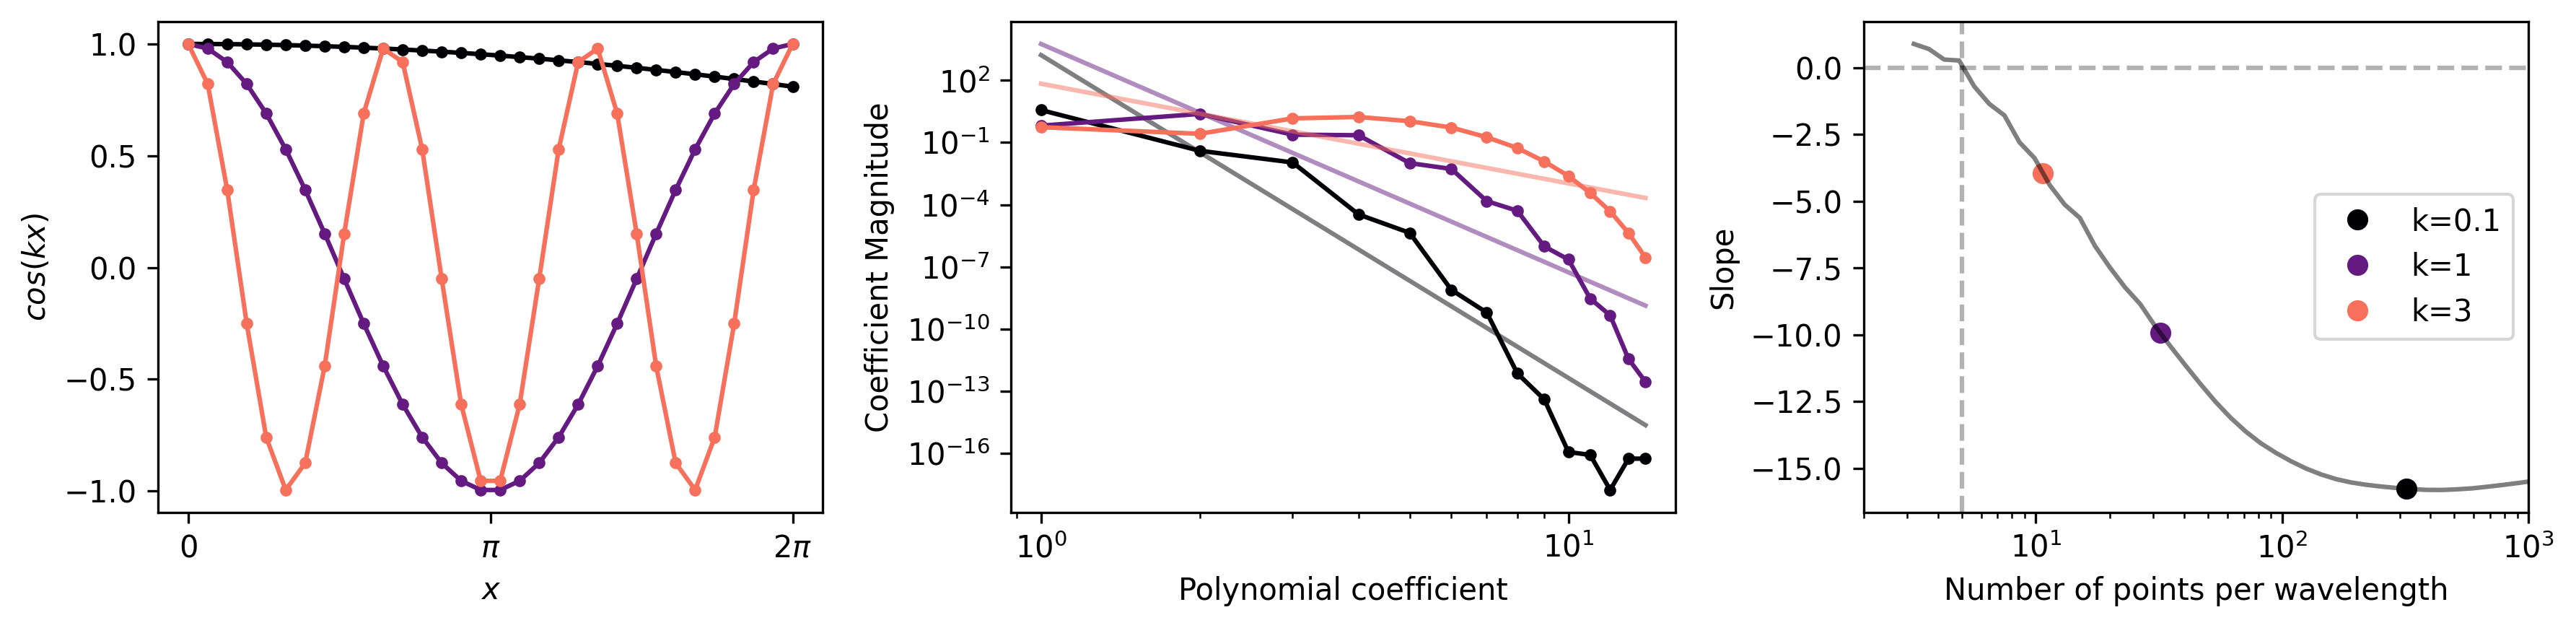

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])


# Define least squares regression function
def least_squares_regression(x, y, start, end):
    x, y = np.asarray(x), np.asarray(y)
    x = x[start:end]
    y = y[start:end]
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n
    return slope, intercept

# Sample data
size_1d = 32
x = np.linspace(0, 2 * np.pi, size_1d)
ks = [0.1, 1, 3]  # Different values of k for the third plot
#colors = ['b', 'g', 'r']  # Colors for different k values
colors = plt.cm.magma(np.array([0, 0.3, 0.7]))

fig = plt.figure(figsize=(12, 3), dpi=300)
gs = GridSpec(1, 3)

# Plot 1: y over x
ax1 = fig.add_subplot(gs[0, 0])
for k, color in zip(ks, colors):
    y = np.exp(1j * x * k)
    ax1.plot(x, np.real(y), '.-', label=f'k={k}', color=color)
#ax1.set_title('Real part of exp(1j * x * k)')
ax1.set_xticks([0, np.pi, 2*np.pi], [r"$0$", r"$\pi$", r"$2\pi$"])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$cos(k x)$')


# Plot 2: Polynomial coefficients and decay
ax2 = fig.add_subplot(gs[0, 1])

for k, color in zip(ks, colors):
    y         = np.exp(1j * x * k)
    max_order = 14
    al_re     = np.zeros(max_order)
    row_re    = np.real(y)

    # Calculate polynomial coefficients
    for i in range(max_order):
        for t in range(max_order):
            al_re[i] += flag_spectral_polynomials[i][t] * row_re[t]  # Using some index range

    order     = np.arange(1, max_order+1)
    al_re_log = np.log(np.abs(al_re) + 1e-14)

    ax2.plot(order, np.abs(al_re), '.-', label=f'k={k} |Coefficients|', color=color)
    slope, intercept = least_squares_regression(np.log(order), al_re_log, start=0, end=14)
    ax2.plot(order, np.exp(intercept) * order**slope, label=f'k={k} Fit: y ~ x^{slope:.2f}', color=color, alpha=0.5)
#ax2.set_title('Polynomial Coefficients Decay')
ax2.set_xlabel('Polynomial coefficient')
ax2.set_ylabel('Coefficient Magnitude')
ax2.set_yscale('log')
ax2.set_xscale('log')

# Plot 3: Slope as a function of k
ax3 = fig.add_subplot(gs[0, 2])
slopes = []
for k, color in zip(ks, colors):
    y = np.exp(1j * x * k)
    row_re = np.real(y)
    al_re = np.zeros(max_order)
    for i in range(max_order):
        al_re[i] = np.dot(flag_spectral_polynomials[i], row_re[:max_order])  # simplified for clarity
    al_re_log = np.log(np.abs(al_re) + 1e-14)
    slope, _ = least_squares_regression(np.log(order), al_re_log, start=0, end=-1)
    slopes.append(slope)
    ax3.plot(size_1d/k, slope, 'o', color=color, label=f'k={k}')

slopes = []
ks = np.logspace(-2, 1, 50)
for k in ks:
    y = np.exp(1j * x * k)
    row_re = np.real(y)
    al_re = np.zeros(max_order)
    for i in range(max_order):
        al_re[i] = np.dot(flag_spectral_polynomials[i], row_re[:max_order])  # simplified for clarity
    al_re_log = np.log(np.abs(al_re) + 1e-14)
    slope, _ = least_squares_regression(np.log(order), al_re_log, start=0, end=-1)
    slopes.append(slope)
ax3.plot(size_1d/ks, slopes, c="k", alpha=0.5)
ax3.axvline(x = 5, c="k", ls = "dashed", alpha=0.3)
ax3.axhline(y = 0, c="k", ls = "dashed", alpha=0.3)
ax3.set_xscale("log")
ax3.set_xlim([2, 1000])
#ax3.set_title('Slope of Fit vs. k')
ax3.set_xlabel('Number of points per wavelength')
ax3.set_ylabel('Slope')
ax3.legend()

plt.tight_layout()
plt.show()


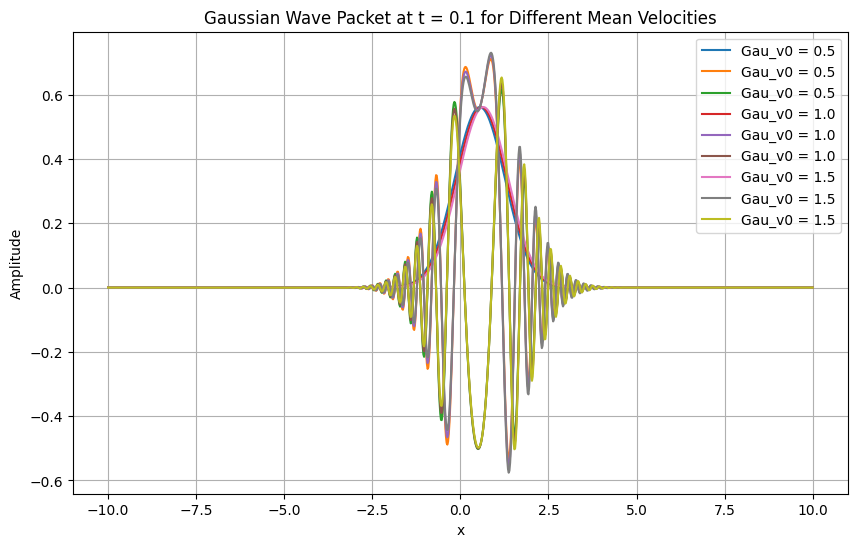

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_wave_packet_1d(t, x, Gau_v0, Gau_Width, Gau_Center):
    # Define constants
    ELBDM_ETA = 1.0  # Example value for ELBDM_ETA

    # Calculate the required constants
    Gau_Const1 = 1.0 + (t / (ELBDM_ETA * Gau_Width**2))**2
    Gau_Theta1 = -0.5 * np.arctan(t / (ELBDM_ETA * Gau_Width**2))

    # Calculate the wave packet
    dr1 = x - Gau_v0 * t - Gau_Center
    dr2 = x - 0.5 * Gau_v0 * t - Gau_Center
    Gau_Const2 = (Gau_Width**2 * np.pi * Gau_Const1)**(-0.25) * np.exp(-0.5 * (dr1 / Gau_Width)**2 / Gau_Const1)
    Gau_Theta2 = (0.5 * dr1**2 * ELBDM_ETA * t / ((ELBDM_ETA * Gau_Width**2)**2 + t**2) + Gau_v0 * ELBDM_ETA * dr2)

    Re = Gau_Const2 * np.cos(Gau_Theta1 + Gau_Theta2)
    Im = Gau_Const2 * np.sin(Gau_Theta1 + Gau_Theta2)

    return Re + 1j * Im

# Example usage
Gau_v0 = 1.0
Gau_Width = 0.1
Gau_Center = 0.5
t = 0.1
x = 0.5

# Example parameters
Gau_Center = 0.5
t = 0.1
x = np.linspace(-10, 10, 1000)

# Different velocities
Gau_v0_values = [0.5, 1.0, 1.5]

# Plotting the wave packet for different Gau_v0 values
plt.figure(figsize=(10, 6))
for Gau_v0 in Gau_v0_values:
    wave_packet = gaussian_wave_packet_1d(t, x, Gau_v0, Gau_Width, Gau_Center)
    plt.plot(x, np.abs(wave_packet)**2, label=f'Gau_v0 = {Gau_v0}')
    plt.plot(x, np.real(wave_packet), label=f'Gau_v0 = {Gau_v0}')
    plt.plot(x, np.imag(wave_packet), label=f'Gau_v0 = {Gau_v0}')

plt.title('Gaussian Wave Packet at t = 0.1 for Different Mean Velocities')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Minimum Wavelength: 0.1921921921921923


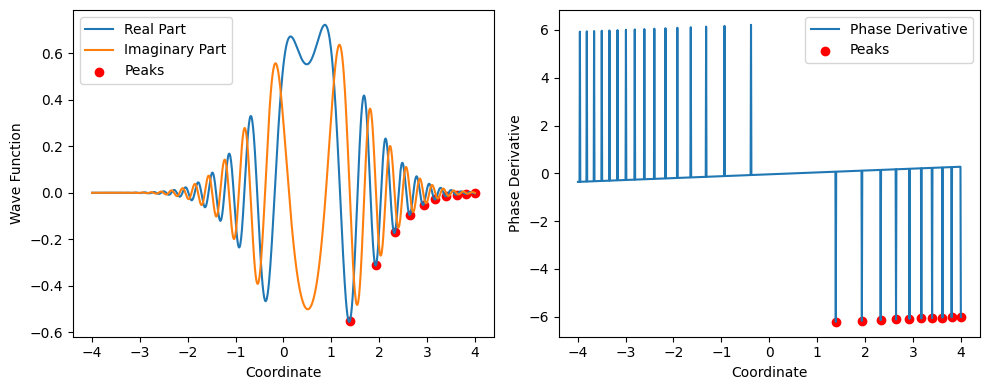

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Gau_v0 = 1.0
Gau_Width = 0.1
Gau_Center = 0.5
t = 0.1
x = 0.5

x = np.linspace(-4, 4, 1000)

wave_packet = gaussian_wave_packet_1d(t, x, Gau_v0, Gau_Width, Gau_Center)
# Calculate the phase of the wave function
phase = np.angle(wave_packet)
phase_derivative = np.diff(phase)

# Detect peaks: where the derivative of the phase changes sign
sign_changes = phase_derivative < -2

# Adjust peak indices by +1 due to the way np.diff() reduces array size
peak_indices = np.where(sign_changes)[0] + 1

# Assuming 'df' is your DataFrame with 'Coord.', 'Real', and 'Imag' columns
# and 'peak_indices' contains the indices of identified peaks in the phase

# Extract coordinates of identified peaks
peak_coords = x[peak_indices]

# Calculate distances between successive peaks
distances_between_peaks = np.diff(peak_coords)

# The minimum wavelength is the smallest of these distances
min_wavelength = np.min(distances_between_peaks) if distances_between_peaks.size > 0 else np.nan

# Output the minimum wavelength
print("Minimum Wavelength:", min_wavelength)

# Plotting for visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, np.real(wave_packet), label='Real Part')
plt.plot(x, np.imag(wave_packet), label='Imaginary Part')
plt.scatter(x[peak_indices], np.real(wave_packet)[peak_indices], color='red', label='Peaks')
plt.xlabel('Coordinate')
plt.ylabel('Wave Function')
plt.legend()


# Plotting phase derivative with peaks correctly
plt.subplot(1, 2, 2)
plt.plot(x[1:], phase_derivative, label='Phase Derivative')  # Adjusted for phase_derivative indexing
# Since peak_indices are for df, align peak_coords for plotting on phase_derivative
plt.scatter(peak_coords, [phase_derivative[i-1] for i in peak_indices], color='red', label='Peaks')  # Corrected
plt.xlabel('Coordinate')
plt.ylabel('Phase Derivative')
plt.legend()

plt.tight_layout()
plt.show()

0 0 0.5 3.141592653589793
[32000.0, 31633.334470142636, 31270.870303122323, 30912.559358472463, 30558.354047334295, 30208.20732613633, 29862.072690346366, 29519.904168294954, 29181.656315069755, 28847.284206479737, 28516.743433088643, 28189.990094316774, 27866.980792610317, 27547.672627677584, 27232.023190791188, 26919.99055915558, 26611.533290339077, 26306.61041676973, 26005.181440294225, 25707.20632679915, 25412.645500893886, 25121.45984065443, 24833.610672427425, 24549.059765693768, 24267.769327991013, 23989.701999894005, 23714.820850053024, 23443.089370288737, 23174.47147074341, 22908.93147508764, 22646.434115782045, 22386.9445293932, 22130.42825196328, 21876.85121443276, 21626.179738115552, 21378.380530225964, 21133.420679456976, 20891.267651609112, 20651.889285269448, 20415.253787540103, 20181.329729815698, 19950.086043609164, 19721.492016425414, 19495.517287682276, 19272.13184467817, 19051.306018605985, 18833.01048061264, 18617.21623790379, 18403.894629893166, 18193.017324396013

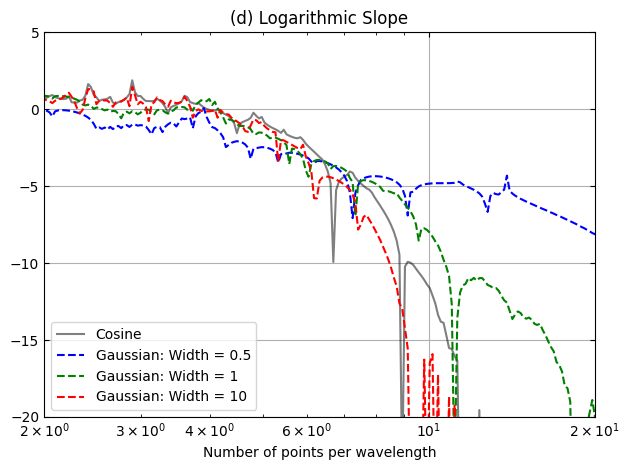

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])


# Define least squares regression function
def least_squares_regression(x, y, start, end):
    x, y = np.asarray(x), np.asarray(y)
    x = x[start:end]
    y = y[start:end]
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n
    return slope, intercept



def calculate_slope(y, convergence_threshold = -6.0, linear_slope = -5.0, max_order = 14, floor=1e-16, precision=np.double):
    al_re     = np.zeros(max_order)
    row_re    = np.real(y)
    order     = np.arange(1, max_order+1)


    # Machine epsilon for single precision
    epsilon = np.finfo(precision).eps

    # Calculate polynomial coefficients
    for i in range(max_order):
        data = row_re[:max_order].astype(precision)
        noisy_data = data + np.random.uniform(-epsilon/2, epsilon/2, size=data.shape)
        al_re[i] = np.dot(flag_spectral_polynomials[i], noisy_data)  # simplified for clarity

    al_re_log = np.log10(np.abs(al_re) + floor)
    al_re_log[al_re_log<convergence_threshold] = -15
    al_re_log += 1/(1+np.exp(al_re_log-convergence_threshold)) * linear_slope * (order-1)

    slope, intercept = least_squares_regression(np.log10(order), al_re_log, start=0, end=max_order)

    return order, al_re_log, slope, intercept, al_re

def calculate_cutoff(y, max_order = 14, precision=np.double):
    order     = np.arange(1, max_order+1)
    coeffs    = np.zeros(max_order)

    # Machine epsilon for single precision
    epsilon = np.finfo(precision).eps

    input_data = np.real(y)

    # Step 1: Normalize the input data
    mean = np.mean(input_data)
    std_dev = np.std(input_data)
    normalized_data = (input_data - mean) / std_dev

    # Calculate polynomial coefficients
    for i in range(max_order):
        data = normalized_data[:max_order].astype(precision)
        noisy_data = data + np.random.uniform(-epsilon/2, epsilon/2, size=data.shape)
        coeffs[i] = np.dot(flag_spectral_polynomials[i], noisy_data)  # simplified for clarity

    return coeffs

def gaussian_wave_packet_1d(t, x, Gau_v0, Gau_Width, Gau_Center):
    # Define constants
    ELBDM_ETA = 1.0  # Example value for ELBDM_ETA

    # Calculate the required constants
    Gau_Const1 = 1.0 + (t / (ELBDM_ETA * Gau_Width**2))**2
    Gau_Theta1 = -0.5 * np.arctan(t / (ELBDM_ETA * Gau_Width**2))

    # Calculate the wave packet
    dr1 = x - Gau_v0 * t - Gau_Center
    dr2 = x - 0.5 * Gau_v0 * t - Gau_Center
    Gau_Const2 = (Gau_Width**2 * np.pi * Gau_Const1)**(-0.25) * np.exp(-0.5 * (dr1 / Gau_Width)**2 / Gau_Const1)
    Gau_Theta2 = (0.5 * dr1**2 * ELBDM_ETA * t / ((ELBDM_ETA * Gau_Width**2)**2 + t**2) + Gau_v0 * ELBDM_ETA * dr2)

    Re = Gau_Const2 * np.cos(Gau_Theta1 + Gau_Theta2)
    Im = Gau_Const2 * np.sin(Gau_Theta1 + Gau_Theta2)
    PPW = 1/Gau_v0 * len(x)
    return Re + 1j * Im, PPW



# Sample data
size_1d = 32
x = np.linspace(0, 2 * np.pi, size_1d)
ks = [0, 1, 4]  # Different values of k for the third plot
ys = [np.exp(1j * x * k) for k in ks]

prec = np.single

#ys = []
#for k in [0.1, 2, 8]:
#    psi, ppw = gaussian_wave_packet_1d(0, x, k, 2, np.pi)
#    ys.append(np.real(psi))
colors = plt.cm.magma(np.array([0, 0.35, 0.7]))
convergence_threshold =  -7
fig = plt.figure()
cutoff_index = 10

slopes = []
ks = np.logspace(-3, 2, 1000)
for k in ks:
    y = np.exp(1j * x * k)
    order, al_re_log, slope, intercept, al_re = calculate_slope(y, convergence_threshold=-7, precision = prec)
    cutoff = np.log10(np.max(np.abs(calculate_cutoff(y, precision=np.double)[cutoff_index:])))
    slopes.append(slope)
plt.plot(size_1d/ks, slopes, c="k", alpha=0.5, label=r"Cosine")

colors = ['b', 'g', 'r']  # Colors for different k values
for i, (t, w, c) in enumerate([[0, 0.5, np.pi], [0, 1, np.pi], [0, 10, np.pi]]):
    print(i, t, w, c)
    slopes=[]
    ppws=[]
    ks = np.logspace(-3, 2, 1000)
    for k in ks:
        psi, ppw = gaussian_wave_packet_1d(t, x, k, Gau_Width = w, Gau_Center = c)
        order, al_re_log, slope, intercept, al_re = calculate_slope(np.real(psi), convergence_threshold=-7, precision = prec)
        cutoff = np.log10(np.max(np.abs(calculate_cutoff(psi, precision=np.double)[cutoff_index:])))
        slopes.append(slope)
        ppws.append(ppw)

    print(ppws, slopes)
    plt.plot(ppws, slopes, c=colors[i], ls="dashed",label=f"Gaussian: Width = {w}")




#ks = np.logspace(-3, 2, 10)
#for k in ks:
#    psi, ppw = gaussian_wave_packet_1d(t, x, k, Gau_Width, Gau_Center)
#    order, al_re_log, slope, intercept, al_re = calculate_slope(np.real(psi), convergence_threshold=-7, precision = prec)
#    cutoff = np.log10(np.max(np.abs(calculate_cutoff(psi, precision=np.double)[cutoff_index:])))
#    slopes.append(cutoff)
#    ppws.append(ppw)
#ax4.plot(ppws, slopes, c='purple', alpha=0.5, ls="dashed",label=r"Gaussian")
#ax3.axvline(x = 5, c="k", ls = "dashed", alpha=0.3)
#ax3.axhline(y = 0, c="k", ls = "dashed", alpha=0.3)
plt.xscale("log")
plt.xlim([2, 20])
plt.ylim([-20,5])
plt.grid()
plt.xlabel('Number of points per wavelength')
plt.title('(d) Logarithmic Slope')
plt.legend(loc="lower left")
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tight_layout()

plt.show()

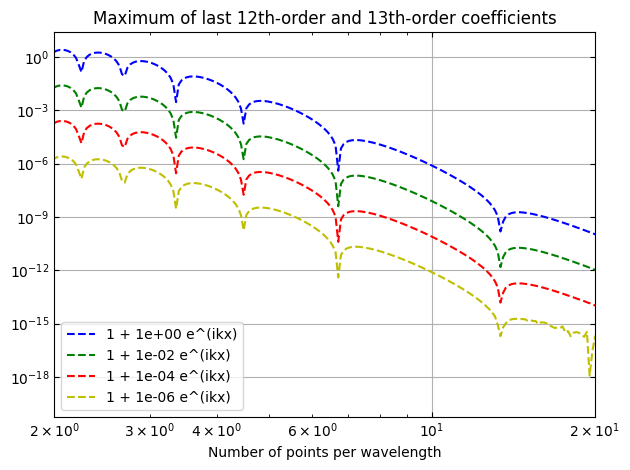

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])


# Define least squares regression function
def least_squares_regression(x, y, start, end):
    x, y = np.asarray(x), np.asarray(y)
    x = x[start:end]
    y = y[start:end]
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n
    return slope, intercept



def calculate_slope(y, convergence_threshold = -6.0, linear_slope = -5.0, max_order = 14, floor=1e-16, precision=np.double):
    al_re     = np.zeros(max_order)
    row_re    = np.real(y)
    order     = np.arange(1, max_order+1)


    # Machine epsilon for single precision
    epsilon = np.finfo(precision).eps

    # Calculate polynomial coefficients
    for i in range(max_order):
        data = row_re[:max_order].astype(precision)
        noisy_data = data + np.random.uniform(-epsilon/2, epsilon/2, size=data.shape)
        al_re[i] = np.dot(flag_spectral_polynomials[i], noisy_data)  # simplified for clarity

    al_re_log = np.log10(np.abs(al_re) + floor)
    al_re_log[al_re_log<convergence_threshold] = -15
    al_re_log += 1/(1+np.exp(al_re_log-convergence_threshold)) * linear_slope * (order-1)

    slope, intercept = least_squares_regression(np.log10(order), al_re_log, start=0, end=max_order)

    return order, al_re_log, slope, intercept, al_re

def calculate_cutoff(y, max_order = 14, precision=np.double):
    order     = np.arange(1, max_order+1)
    coeffs    = np.zeros(max_order)

    # Machine epsilon for single precision
    epsilon = np.finfo(precision).eps

    input_data = np.real(y)

    # Step 1: Normalize the input data
    #mean = np.mean(input_data)
    #std_dev = np.std(input_data)
    #normalized_data = (input_data - mean) / std_dev
    normalized_data = input_data 

    # Calculate polynomial coefficients
    for i in range(max_order):
        data = normalized_data[:max_order].astype(precision)
        noisy_data = data + np.random.uniform(-epsilon/2, epsilon/2, size=data.shape)
        coeffs[i] = np.dot(flag_spectral_polynomials[i], noisy_data)  # simplified for clarity


    return coeffs

def gaussian_wave_packet_1d(t, x, Gau_v0, Gau_Width, Gau_Center):
    # Define constants
    ELBDM_ETA = 1.0  # Example value for ELBDM_ETA

    # Calculate the required constants
    Gau_Const1 = 1.0 + (t / (ELBDM_ETA * Gau_Width**2))**2
    Gau_Theta1 = -0.5 * np.arctan(t / (ELBDM_ETA * Gau_Width**2))

    # Calculate the wave packet
    dr1 = x - Gau_v0 * t - Gau_Center
    dr2 = x - 0.5 * Gau_v0 * t - Gau_Center
    Gau_Const2 = (Gau_Width**2 * np.pi * Gau_Const1)**(-0.25) * np.exp(-0.5 * (dr1 / Gau_Width)**2 / Gau_Const1)
    Gau_Theta2 = (0.5 * dr1**2 * ELBDM_ETA * t / ((ELBDM_ETA * Gau_Width**2)**2 + t**2) + Gau_v0 * ELBDM_ETA * dr2)

    Re = Gau_Const2 * np.cos(Gau_Theta1 + Gau_Theta2)
    Im = Gau_Const2 * np.sin(Gau_Theta1 + Gau_Theta2)
    PPW = 1/Gau_v0 * len(x)
    return Re + 1j * Im, PPW


def background_perturbation(t, x, A, B, k):
    Re =  A + B * np.cos(x * k)
    Im =  A + B * np.sin(x * k)
    return Re + 1j * Im



# Sample data
size_1d = 32
x = np.linspace(0, 2 * np.pi, size_1d)
ks = [0, 1, 4]  # Different values of k for the third plot
ys = [np.exp(1j * x * k) for k in ks]

prec = np.single

#ys = []
#for k in [0.1, 2, 8]:
#    psi, ppw = gaussian_wave_packet_1d(0, x, k, 2, np.pi)
#    ys.append(np.real(psi))
colors = plt.cm.magma(np.array([0, 0.35, 0.7]))
convergence_threshold =  -6
fig = plt.figure()
cutoff_index = 13

#slopes = []
#ks = np.logspace(-3, 2, 10000)
#for k in ks:
#    y = np.exp(1j * x * k)
#    order, al_re_log, slope, intercept, al_re = calculate_slope(y, convergence_threshold=-7, precision = prec)
#    cutoff = np.log10(np.max(np.abs(calculate_cutoff(y, precision=np.double)[cutoff_index:])))
#    slopes.append(cutoff)
#plt.plot(size_1d/ks, slopes, c="k", alpha=0.5, label=r"Cosine")
#
#colors = ['b', 'g', 'r']  # Colors for different k values
#for i, (t, w, c) in enumerate([[0, 0.5, np.pi], [0, 1, np.pi], [0, 10, np.pi]]):
#    print(i, t, w, c)
#    slopes=[]
#    ppws=[]
#    ks = np.logspace(-3, 2, 1000)
#    for k in ks:
#        psi, ppw = gaussian_wave_packet_1d(t, x, k, Gau_Width = w, Gau_Center = c)
#        order, al_re_log, slope, intercept, al_re = calculate_slope(np.real(psi) + np.random.uniform(-1e-5, 1e-5, size=x.shape), convergence_threshold=-7, precision = prec)
#        cutoff = np.log10(np.max(np.abs(calculate_cutoff(psi, precision=np.double)[cutoff_index:])))
#        slopes.append(cutoff)
#        ppws.append(ppw)
#
#    print(ppws, slopes)
#    plt.plot(ppws, slopes, c=colors[i], ls="dashed",label=f"Gaussian: Width = {w}")



colors = ['b', 'g', 'r', "y"]  # Colors for different k values
for i, (A, B) in enumerate([[1, 1], [1, 1e-2], [1, 1e-4], [1, 1e-6]]):
    slopes=[]
    ks = np.logspace(-3, 2, 1000)
    for k in ks:
        psi = background_perturbation(0, x, A, B, k)
        order, al_re_log, slope, intercept, al_re = calculate_slope(np.real(psi) + np.random.uniform(-1e-5, 1e-5, size=x.shape), convergence_threshold=-7, precision = prec)
        cutoff = np.max(np.abs(calculate_cutoff(psi, precision=np.double)[cutoff_index:]))
        slopes.append(cutoff)

    plt.plot(size_1d/ks, slopes, c=colors[i], ls="dashed",label=f"{A} + {B:.0e} e^(ikx)")

plt.xscale("log")
plt.yscale("log")
plt.xlim([2, 20])
plt.xlim([2, 20])

plt.grid()
plt.xlabel('Number of points per wavelength')
plt.title('Maximum of last 12th-order and 13th-order coefficients')
plt.legend(loc="lower left")
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.tight_layout()

plt.show()

In [13]:
pip install pillow pytesseract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from PIL import Image
import pytesseract

# Set the path to the tesseract executable
# On Windows, for example:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# On Linux/macOS, Tesseract is usually in the system path

# Open the screenshot image using Pillow (PIL)
image_path = '/home/xerox/Pictures/Screenshots/Screenshot from 2024-11-17 18-49-00.png'  # Replace with the path to your screenshot
img = Image.open(image_path)

# Use pytesseract to extract text
text = pytesseract.image_to_string(img)

# Print the digitized text
print("Extracted text from screenshot:")
print(text)

TesseractError: (1, 'Error opening data file /snap/tesseract/current/usr/local/share/tessdata/eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

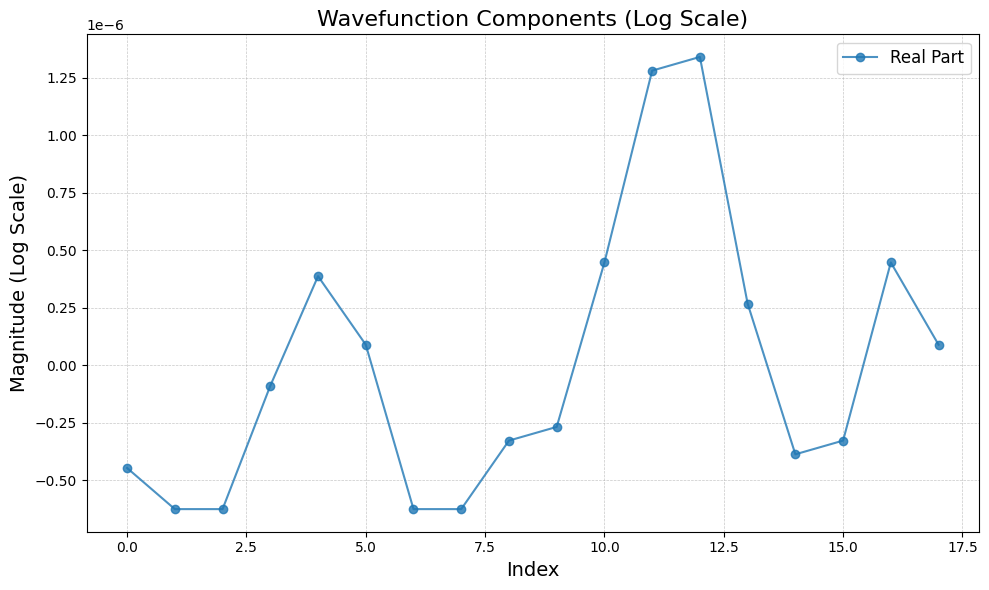

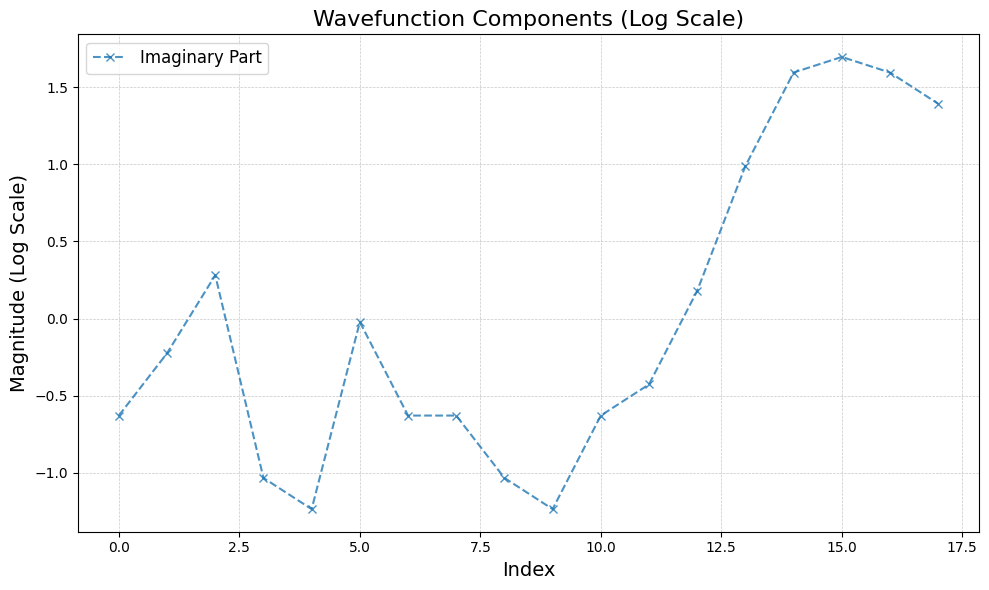

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays to visualize
re_wavefunction = np.array([-4.47035e-07, -6.25849e-07, -6.25849e-07, -8.9407e-08,
                            3.8743e-07, 8.9407e-08, -6.25849e-07, -6.25849e-07,
                            -3.27826e-07, -2.68221e-07, 4.47035e-07, 1.2815e-06,
                            1.3411e-06, 2.68221e-07, -3.8743e-07, -3.27826e-07,
                            4.47035e-07, 8.9407e-08])

im_wavefunction = np.array([-0.629055, -0.224662, 0.280828, -1.03345, -1.23564, 
                            -0.0224662, -0.629055, -0.629055, -1.03345, -1.23564, 
                            -0.629055, -0.426859, 0.17973, 0.988514, 1.5951, 
                            1.6962, 1.5951, 1.39291])

# Visualization with log-scale on y-axis
x_indices = np.arange(len(re_wavefunction))  # indices for x-axis

plt.figure(figsize=(10, 6))

# Plot real part
plt.plot(x_indices, re_wavefunction, label='Real Part', marker='o', linestyle='-', alpha=0.8)


# Add labels, legend, and grid
plt.xlabel("Index", fontsize=14)
plt.ylabel("Magnitude (Log Scale)", fontsize=14)
plt.title("Wavefunction Components (Log Scale)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

# Plot imaginary part
plt.plot(x_indices, im_wavefunction, label='Imaginary Part', marker='x', linestyle='--', alpha=0.8)


# Add labels, legend, and grid
plt.xlabel("Index", fontsize=14)
plt.ylabel("Magnitude (Log Scale)", fontsize=14)
plt.title("Wavefunction Components (Log Scale)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


                                     RunName   v0  Threshold      Time  \
0     gramfe_matmul_single_Gau_v0_Refinement  0.1       -5.0  0.000000   
1     gramfe_matmul_single_Gau_v0_Refinement  0.1       -5.0  0.015915   
2     gramfe_matmul_single_Gau_v0_Refinement  0.1       -5.0  0.031831   
3     gramfe_matmul_single_Gau_v0_Refinement  0.1       -5.0  0.047746   
4     gramfe_matmul_single_Gau_v0_Refinement  0.1       -5.0  0.063662   
...                                      ...  ...        ...       ...   
1184  gramfe_matmul_single_Gau_v0_Refinement  1.5        1.0  0.127324   
1185  gramfe_matmul_single_Gau_v0_Refinement  1.5        1.0  0.143239   
1186  gramfe_matmul_single_Gau_v0_Refinement  1.5        1.0  0.143239   
1187  gramfe_matmul_single_Gau_v0_Refinement  1.5        1.0  0.159155   
1188  gramfe_matmul_single_Gau_v0_Refinement  1.5        1.0  0.159155   

      NPatch   Error(Dens)   Error(Real)  
0      144.0  6.883638e-07  6.070986e-07  
1      144.0  6.883638e-0

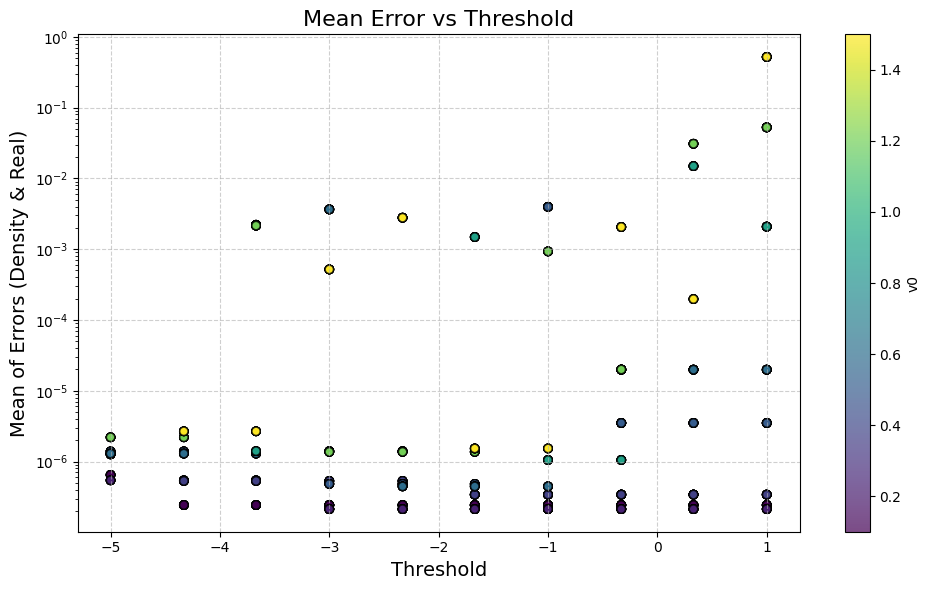

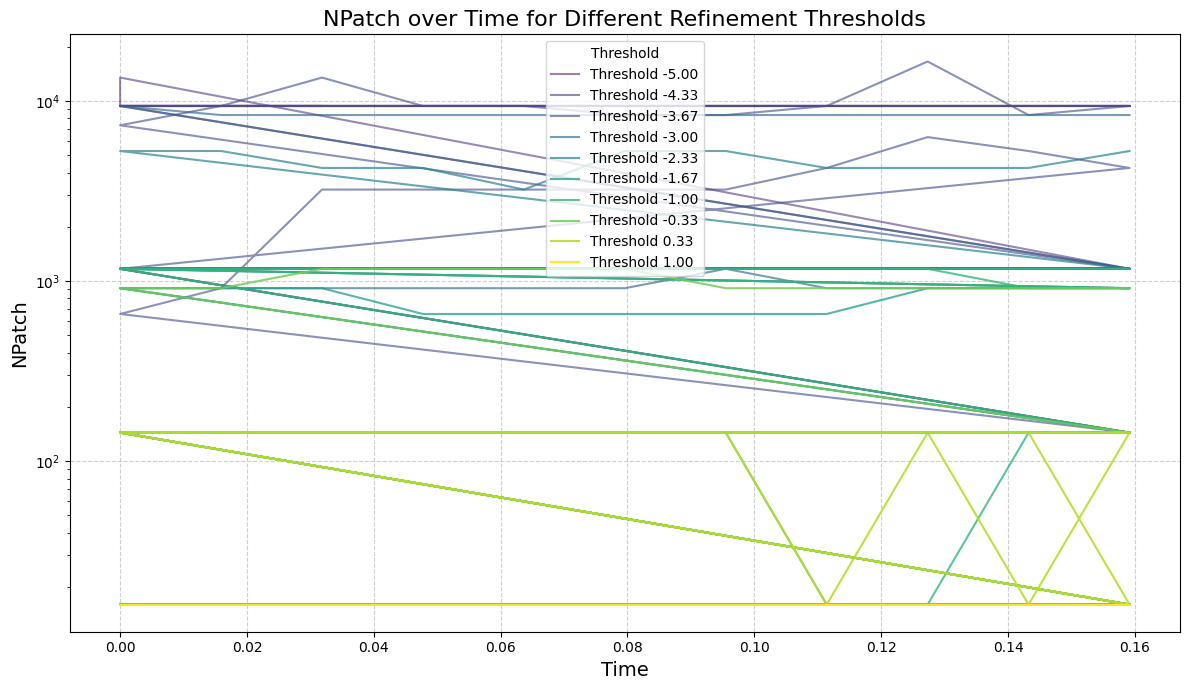

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Filepath to the CSV file
file_path = "refinement_test.csv"  # Replace with the path to your file

# Read the CSV file into a pandas DataFrame
#columns = ["RunName", "Threshold", "Time", "NPatch", "Error(Dens)", "Error(Real)"]
data = pd.read_csv(file_path)
print(data)
# Convert numerical columns to proper data types
data["Threshold"] = data["Threshold"].astype(float)
data["v0"] = data["v0"].astype(float)
data["Time"] = data["Time"].astype(float)
data["NPatch"] = data["NPatch"].astype(float)
data["Error(Dens)"] = data["Error(Dens)"].astype(float)
data["Error(Real)"] = data["Error(Real)"].astype(float)

# Calculate the mean of the two errors
data["MeanError"] = (data["Error(Dens)"] + data["Error(Real)"]) / 2

# Create a scatter plot of MeanError vs Threshold
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data["Threshold"], data["MeanError"], 
                      c=data["v0"], cmap="viridis", alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label="v0")  # Color bar to indicate v0 values
plt.xlabel("Threshold", fontsize=14)
plt.yscale("log")
plt.ylabel("Mean of Errors (Density & Real)", fontsize=14)
plt.title("Mean Error vs Threshold", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Group data by Threshold for NPatch over Time plot
unique_thresholds = sorted(data["Threshold"].unique())
colors = cm.viridis(np.linspace(0, 1, len(unique_thresholds)))  # Color mapping

plt.figure(figsize=(12, 7))
for i, threshold in enumerate(unique_thresholds):
    threshold_data = data[data["Threshold"] == threshold]
    plt.plot(
        threshold_data["Time"],
        threshold_data["NPatch"],
        label=f"Threshold {threshold:.2f}",
        color=colors[i],
        alpha=0.5 + 0.5 * (i / len(unique_thresholds)),  # Higher alpha for higher thresholds
        linewidth=1.5
    )

# Customize the plot
plt.yscale("log")
plt.xlabel("Time", fontsize=14)
plt.ylabel("NPatch", fontsize=14)
plt.title("NPatch over Time for Different Refinement Thresholds", fontsize=16)
plt.legend(title="Threshold", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
threshold_data["Time"]

4234    0.000000
4235    0.015915
4236    0.015915
4237    0.031831
4238    0.031831
          ...   
7829    0.286479
7830    0.302394
7831    0.318310
7832    0.334225
7833    0.339952
Name: Time, Length: 170, dtype: float64

In [ ]:
threshold_data["Time"]